In [1]:
import pandas as pd

df = pd.read_excel(r'Downloads\chatgpt1.xlsx')
print(df)

                        Datetime      Tweet Id  \
0      2023-01-22 13:44:34+00:00  1.617156e+18   
1      2023-01-22 13:44:39+00:00  1.617156e+18   
2      2023-01-22 13:44:44+00:00  1.617156e+18   
3      2023-01-22 13:44:49+00:00  1.617156e+18   
4      2023-01-22 13:44:52+00:00  1.617156e+18   
...                          ...           ...   
49996  2023-01-24 06:57:56+00:00  1.617779e+18   
49997  2023-01-24 06:57:59+00:00  1.617779e+18   
49998  2023-01-24 06:58:00+00:00  1.617779e+18   
49999  2023-01-24 06:58:01+00:00  1.617779e+18   
50000  2023-01-24 06:58:01+00:00  1.617779e+18   

                                                    Text         Username  \
0      ChatGPTã§éŠã¶ã®å¿˜ã‚Œã¦ãŸï¼ï¼\næ›¸é¡žä...      mochico0123   
1      @AlexandrovnaIng Prohibition of ChatGPT has be...  Caput_LupinumSG   
2      Schaut Euch an, was @fobizz @DianaKnodel alles...            ciffi   
3      Bow down to chatGPT ðŸ«¡..... https://t.co/ENT...    Vishwasrisiri   
4      Profili

In [10]:
#Creating a function that takes care of all the preprocessing stuff.
def preprocess():

  df['Text'] = df['Text'].str.lower() # Ensuring all words in the Tweet column of training data are lowercased

  # Parsing the stop_words.txt file and storing all the words in a list.
  stopwords = []
  with open('Downloads/sample.txt','r') as file:    
      for line in file:         
          for word in line.split():            
              stopwords.append(word)

  # Removing all stopwords from all the tweets in training data.
  #df["Text"] = df["Text"].apply(lambda func: ' '.join(sw 
   #                                         for sw in func.split() 
    #                                        if sw not in stopwords))
  #Training Data
  df['Text'] = df['Text'].str.replace(r'http?://[^\s<>"]+|www\.[^\s<>"]+', '') # Removing hyperlinks from all the tweets
  df['Text'] = df['Text'].str.replace('@[A-Za-z0-9]+', '') # Removing usernames from all the tweets.
  df['Text'] = df['Text'].str.replace(r'\B#\w*[a-zA-Z]+\w*', '') # Removing hashtags, including the text, from all the tweets
  df['Text'] = df['Text'].str.replace('\d+', '') # Removing numbers from all the tweets

  special_chars = ["!",'"',"%","&","amp","'","(",")", "*","+",",","-",".",
                  "/",":",";","<","=",">","?","[","\\","]","^","_",
                  "`","{","|","}","~","–","@","#","$"]

  for c in special_chars:
      df['Text'] = df['Text'].str.replace(c,'') # Removing all special characters from all the tweets

In [12]:
preprocess()

C:\Users\Arham\AppData\Local\Temp\ipykernel_22544\3785458668.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace(r'http?://[^\s<>"]+|www\.[^\s<>"]+', '') # Removing hyperlinks from all the tweets
C:\Users\Arham\AppData\Local\Temp\ipykernel_22544\3785458668.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('@[A-Za-z0-9]+', '') # Removing usernames from all the tweets.
C:\Users\Arham\AppData\Local\Temp\ipykernel_22544\3785458668.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace(r'\B#\w*[a-zA-Z]+\w*', '') # Removing hashtags, including the text, from all the tweets
C:\Users\Arham\AppData\Local\Temp\ipykernel_22544\3785458668.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  df

In [13]:
print(df)

                        Datetime      Tweet Id  \
0      2023-01-22 13:44:34+00:00  1.617156e+18   
1      2023-01-22 13:44:39+00:00  1.617156e+18   
2      2023-01-22 13:44:44+00:00  1.617156e+18   
3      2023-01-22 13:44:49+00:00  1.617156e+18   
4      2023-01-22 13:44:52+00:00  1.617156e+18   
...                          ...           ...   
49996  2023-01-24 06:57:56+00:00  1.617779e+18   
49997  2023-01-24 06:57:59+00:00  1.617779e+18   
49998  2023-01-24 06:58:00+00:00  1.617779e+18   
49999  2023-01-24 06:58:01+00:00  1.617779e+18   
50000  2023-01-24 06:58:01+00:00  1.617779e+18   

                                                    Text         Username  \
0      chatgptã§éšã¶ã®å¿˜ã‚œã¦ãÿï¼ï¼\næ›¸é¡žä...      mochico0123   
1       prohibition of chatgpt has been added to the ...  Caput_LupinumSG   
2      schaut euch an was   alles â¬‡ï¸ auf die pist...            ciffi   
3              bow down to chatgpt ðÿ«¡ httpstcoentsziaq    Vishwasrisiri   
4      profili

In [36]:
#Feature and Label selection

y_col = 'Language'
y = df[y_col]

x_col = 'Text'
x = df[x_col]
y, x

(0        ja
 1        en
 2        de
 3        en
 4        tr
          ..
 49996    de
 49997    de
 49998    it
 49999    en
 50000    es
 Name: Language, Length: 50001, dtype: object,
 0        chatgptã§éšã¶ã®å¿˜ã‚œã¦ãÿï¼ï¼\næ›¸é¡žä...
 1         prohibition of chatgpt has been added to the ...
 2        schaut euch an was   alles â¬‡ï¸ auf die pist...
 3                bow down to chatgpt ðÿ«¡ httpstcoentsziaq
 4        profilinde vatan tã¼rkiye falan yazan bireyler...
                                ...                        
 49996     ist ein  der durch kã¼nstliche intelligenz   ...
 49997     ich hab mal die ai dazu befragt chatgpt https...
 49998     minuti di  e ho capito che apprende in manier...
 49999    portland shop uses chatgpt to tell family stor...
 50000    ahora sueã±o con el dã­a en que amazon integre...
 Name: Text, Length: 50001, dtype: object)

In [37]:
#Splitting into training and testing

training_data_x = x.sample(frac=0.8, random_state=25)
testing_data_x = x.drop(training_data_x.index)

training_data_y = y.sample(frac=0.8, random_state=25)
testing_data_y = y.drop(training_data_y.index)

print(f"No. of training examples: {training_data_x.shape[0]}")
print(f"No. of testing examples: {testing_data_x.shape[0]}")

No. of training examples: 40001
No. of testing examples: 10000


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

# Assuming training_data_x is a pandas Series or DataFrame column containing the text data

training_data_x = training_data_x.fillna('')
testing_data_x = testing_data_x.fillna('')
training_data_y = training_data_y.fillna('')
testing_data_y = testing_data_y.fillna('')

#Vectorization
X_train_tfidf = tfidf.fit_transform(training_data_x)
X_test_tfidf = tfidf.transform(testing_data_x)


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [55]:
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the value of n_neighbors as per your requirements
knn.fit(X_train_tfidf, training_data_y)
y_pred = knn.predict(X_test_tfidf)

# Evaluate the accuracy of the model
accuracy = accuracy_score(testing_data_y, y_pred)


In [56]:
accuracy

0.285

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate precision
precision = precision_score(testing_data_y, y_pred, average='macro')

# Calculate recall
recall = recall_score(testing_data_y, y_pred, average='macro')

# Calculate F1-score
f1 = f1_score(testing_data_y, y_pred, average='macro')

# Calculate accuracy
accuracy = accuracy_score(testing_data_y, y_pred)

# Print the metrics
print("For KNN Model:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("Accuracy: ", accuracy)


For KNN Model:
Precision:  0.4905810487211447
Recall:  0.2731221677235438
F1-score:  0.27523240794016923
Accuracy:  0.285


C:\Users\Arham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Create an instance of the Decision Tree classifier
dt = DecisionTreeClassifier()

# Fit the Decision Tree model on the training data
dt.fit(X_train_tfidf, training_data_y)

# Make predictions on the test data
y_pred = dt.predict(X_test_tfidf)

# Calculate precision
precision = precision_score(testing_data_y, y_pred, average='macro')

# Calculate recall
recall = recall_score(testing_data_y, y_pred, average='macro')

# Calculate F1-score
f1 = f1_score(testing_data_y, y_pred, average='macro')

# Calculate accuracy
accuracy = accuracy_score(testing_data_y, y_pred)

# Print the metrics
print("For Decision Tree Model:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("Accuracy: ", accuracy)

For Decision Tree Model:
Precision:  0.4549918969747597
Recall:  0.3735043984208532
F1-score:  0.3939468614735153
Accuracy:  0.9241


C:\Users\Arham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(10000,)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Create an instance of the Random Forest classifier
rf = RandomForestClassifier()

# Fit the Random Forest model on the training data
rf.fit(X_train_tfidf, training_data_y)

# Make predictions on the test data
y_pred = rf.predict(X_test_tfidf)

# Calculate precision
precision = precision_score(testing_data_y, y_pred, average='macro')

# Calculate recall
recall = recall_score(testing_data_y, y_pred, average='macro')

# Calculate F1-score
f1 = f1_score(testing_data_y, y_pred, average='macro')

# Calculate accuracy
accuracy = accuracy_score(testing_data_y, y_pred)

# Print the metrics
print("For Random Forest Model:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("Accuracy: ", accuracy)

For Random Forest Model:
Precision:  0.5591438916838944
Recall:  0.42004085900485016
F1-score:  0.4447027658945936
Accuracy:  0.9524


C:\Users\Arham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Create an instance of the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Fit the Multinomial Naive Bayes model on the training data
nb.fit(X_train_tfidf, training_data_y)

# Make predictions on the test data
y_pred = nb.predict(X_test_tfidf)

# Calculate precision
precision = precision_score(testing_data_y, y_pred, average='macro')

# Calculate recall
recall = recall_score(testing_data_y, y_pred, average='macro')

# Calculate F1-score
f1 = f1_score(testing_data_y, y_pred, average='macro')

# Calculate accuracy
accuracy = accuracy_score(testing_data_y, y_pred)

# Print the metrics
print("For Multinomial Naive Bayes Classifier Model:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("Accuracy: ", accuracy)


For Multinomial Naive Bayes Classifier Model:
Precision:  0.31105397935666707
Recall:  0.2449513111639507
F1-score:  0.2583955770998612
Accuracy:  0.9213


C:\Users\Arham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

df = df.fillna('')

tfidf_matrix = tfidf.fit_transform(df['Text'])

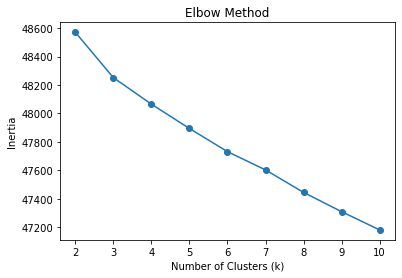

In [79]:
# Initialize an empty list to store the inertia values
inertia_values = []

# Try different values of k (number of clusters)
k_values = range(2, 11)  # Assuming you want to try values from 2 to 10

for k in k_values:
    # Create an instance of the KMeans clustering algorithm
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the KMeans model to the TF-IDF matrix
    kmeans.fit(tfidf_matrix)
    
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values to visualize the elbow
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


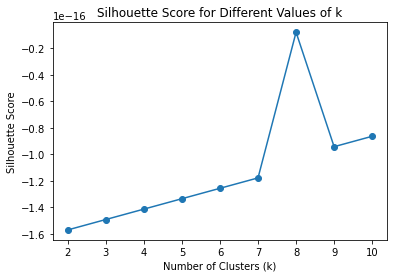

In [76]:
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    labels = kmeans.labels_
    score = silhouette_score(tfidf_matrix, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()
